In [0]:
import keras
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, AveragePooling2D
from tensorflow.keras. models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3, Xception, ResNet50, VGG16, VGG19, MobileNet

In [25]:
init_learning_rate = 1e-3
total_epochs = 10
batch = 16

base_model = MobileNet(weights="imagenet", include_top=False, input_tensor=Input(shape=(512, 512, 3)))
#base_model.summary()

head = base_model.output
head = AveragePooling2D(pool_size = (4, 4))(head)
head = Flatten(name = "flatten")(head)
head = Dense(64, activation = "relu")(head)
head = Dropout(0.5)(head)
head = Dense(2, activation = "softmax")(head)

model = Model(inputs = base_model.input, outputs = head)

for layer in base_model.layers:
    layer.trainable = False
    

17227776/17225924 [==============================] - 0s 0us/step


In [26]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 513, 513, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 256, 256, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 256, 256, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 256, 256, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 256, 256, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 256, 256, 32)      128 

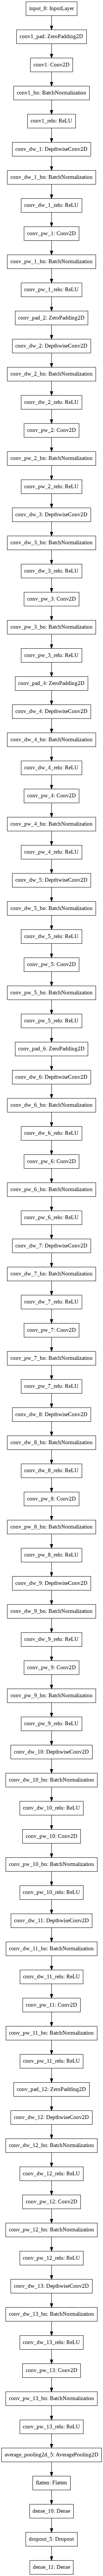

In [27]:
tf.keras.utils.plot_model(model, 'Wazir_first_model.png')